In [1]:
from utils import *
import numpy as np
from tqdm import tqdm
from copy import copy, deepcopy
from skimage.measure import label

# Parsing

In [2]:
def parse(inlines):
    return [ints(l) for l in inlines.split("\n")]

ls = parse(open("data/input14.txt").read())
w, h = 101, 103

# Part 1

In [3]:
nsec = 100
ls2 = deepcopy(ls)
for sec in range(nsec):
    newls = []
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        vx = ex[2]
        vy = ex[3]
        newex = [(px+vx)%w,(py+vy)%h,vx,vy]
        newls.append(newex)
    ls2 = newls

def get_quad(w, h, y, x):
    midrow = (h-1)/2
    midcol = (w-1)/2
    if y<midrow and x<midcol:
        return 1
    if y>midrow and x<midcol:
        return 2
    if y<midrow and x>midcol:
        return 3
    if y>midrow and x>midcol:
        return 4
    return 0

quads = {1:0,2:0,3:0,4:0}
for ex in ls2:
    px = ex[0]
    py = ex[1]
    quad = get_quad(w,h,py,px)
    if quad>0:
        quads[quad] += 1
accum = 1
for k,v in quads.items():
    accum *= v
print(accum)

216772608


# Part 2

In [4]:
nsec = 10000
ls2 = deepcopy(ls)
quads = None
for sec in tqdm(range(nsec)):
    newls = []
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        vx = ex[2]
        vy = ex[3]
        newex = [(px+vx)%w,(py+vy)%h,vx,vy]
        newls.append(newex)
    ls2 = newls
    arr = np.zeros((h,w))
    for ex in ls2:
        px = ex[0]
        py = ex[1]
        arr[py, px] += 1
    conn = label(arr>0, connectivity=1)
    counts = []
    for v in range(1,np.max(conn)+1):
        counts.append(np.sum(conn==v))
    maxcount = np.max(counts)
    if maxcount > 100:
        print(sec+1)
        break

  0%|          | 0/10000 [00:00<?, ?it/s]

 69%|██████▉   | 6887/10000 [00:46<00:20, 148.49it/s]

6888


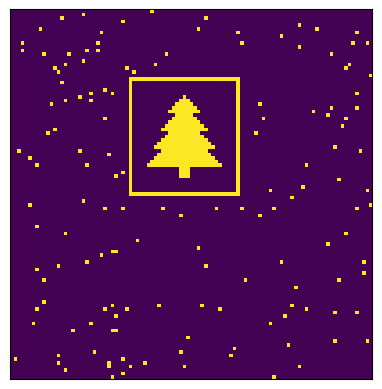

In [10]:
import matplotlib.pyplot as plt
plt.imshow(arr)
plt.xticks([])
plt.yticks([])
plt.savefig("images/14.png")